<a href="https://colab.research.google.com/github/Letch49/ML-vvsu-2025-2026/blob/master/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas seaborn scikit-learn

# **Практическое Задание №3 Загрядский Р.Д. БПИ-23-1**

#Задачи:

1. Выбрать номинальное значение как целевую переменную
2. Провести разведочный анализ **включая** анализ зависимости между номинальными переменными (chi2)
3. Выбрать `best_features`
4. Сделать нормализацию данных (scaler, onehotencoding)
4. Обучить модель логистической регрессии
5. Вывести метрики качества, описать полученный результат (также вывести коэфициенты модели)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [3]:
df = pd.read_csv('/Customers.csv')

In [4]:
df.info()
print()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB



,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


Заполняем пропуски и меняем тип данных столбцов на **категореальный**

In [6]:
df["Profession"] = df["Profession"].fillna("Unknown")
df["Gender"] = df["Gender"].astype("category")
df["Profession"] = df["Profession"].astype("category")

#*Выбираем целевую переменную.*


В качестве целевой переменной было принято решение выбрать gender(Пол)

In [7]:
y = df["Gender"]
X = df.drop("Gender", axis=1)

### EDA

**1. Анализ целевой переменной**

Распределение классов:
Gender
Female    1186
Male       814

Распределение классов в долях:
Gender
Female    0.593
Male      0.407


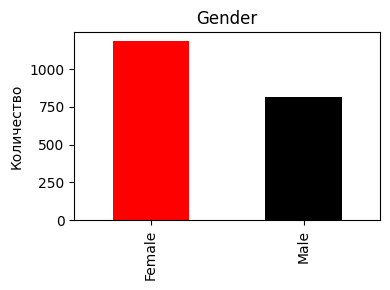

In [10]:
class_counts = df['Gender'].value_counts()
class_props = df['Gender'].value_counts(normalize=True).round(4)
print("Распределение классов:")
print(class_counts.to_string())
print("\nРаспределение классов в долях:")
print(class_props.to_string())
plt.figure(figsize=(4,3))
class_counts.plot(kind='bar', color=['red', 'black'])
plt.title("Gender")
plt.xlabel("")
plt.ylabel("Количество")
plt.tight_layout()
plt.show()

Как видно из графика, в данных таблицы существует значительное преобладание женского пола(Female). Данная информация может помочь при построении модели.

# **2. Анализ категориальных признаков относительно целевой переменной**

Статистика хи-квадрат: 5.854142530282544
p-значение: 0.7544229533765603
Степени свободы: 9
Не отвергаем нулевую гипотезу, потому что нет значимой зависимости между Gender и Profession.


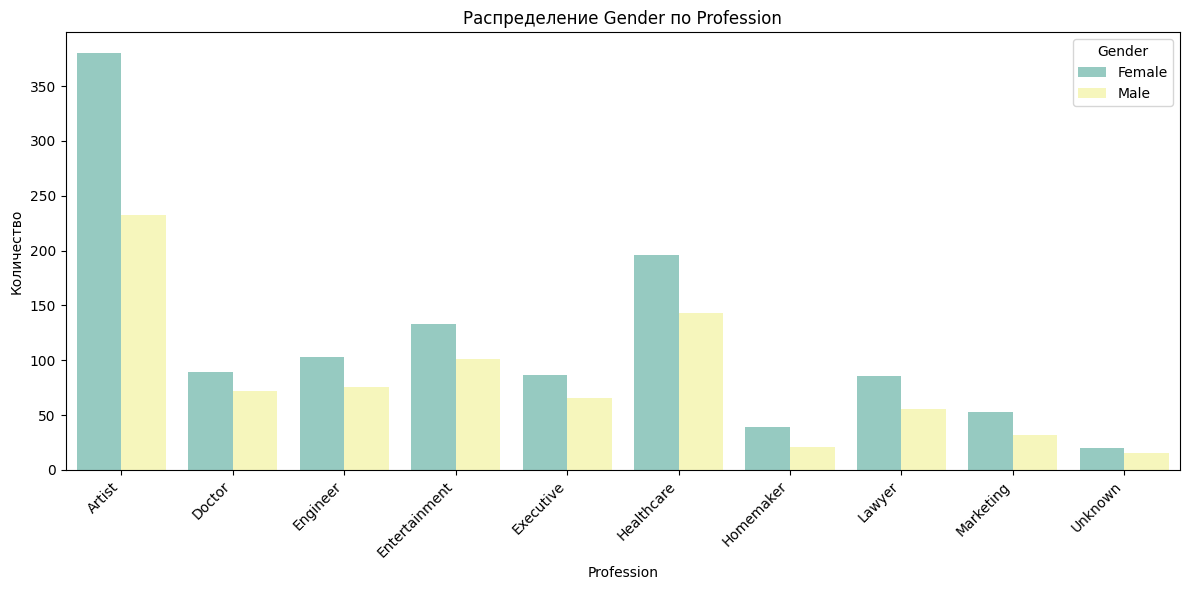

In [18]:
contingency_table = pd.crosstab(df['Gender'], df['Profession'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Статистика хи-квадрат: {chi2}")
print(f"p-значение: {p}")
print(f"Степени свободы: {dof}")
alpha = 0.05
if p < alpha:
    print("Отвергаем нулевую гипотезу, потому что существует значимая зависимость между Gender и Profession.")
else:
    print("Не отвергаем нулевую гипотезу, потому что нет значимой зависимости между Gender и Profession.")
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Profession', hue='Gender', palette='Set3')
plt.title('Распределение Gender по Profession')
plt.xlabel('Profession')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Поскольку p-значение больше, чем alpha 0.05, мы не отвергаем нулевую гипотезу. Это означает, что на основе имеющихся данных у нас нет достаточных статистических доказательств, чтобы утверждать, что существует значимая зависимость между полом и профессией в этом наборе данных.

График распределений позволяет судить о том, что несмотря на незначительное преобладание женщин среди профессий разного типа, этой информации будет недостаточно для обучения модели, ибо влияние на целевую переменную Gender незначительно.

# **3. Анализ числовых признаков относительно целевой переменной**

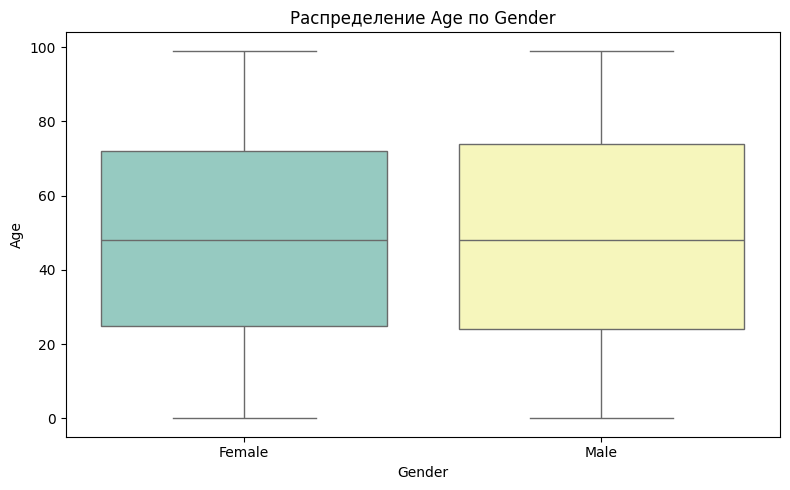


Описательные статистики для Age по Gender:
         count       mean        std  min   25%   50%   75%   max
Gender                                                           
Female  1186.0  48.822934  28.263988  0.0  25.0  48.0  72.0  99.0
Male     814.0  49.159705  28.685795  0.0  24.0  48.0  74.0  99.0
------------------------------


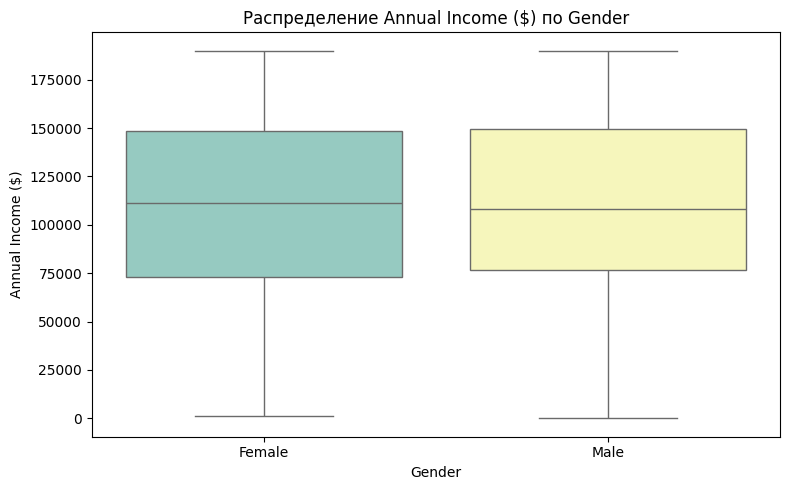


Описательные статистики для Annual Income ($) по Gender:
         count           mean           std     min       25%       50%  \
Gender                                                                    
Female  1186.0  110553.715008  45883.436382  1000.0  73135.50  111174.0   
Male     814.0  110991.323096  45555.982548     0.0  76913.75  108055.0   

              75%       max  
Gender                       
Female  148733.75  189974.0  
Male    149536.25  189945.0  
------------------------------


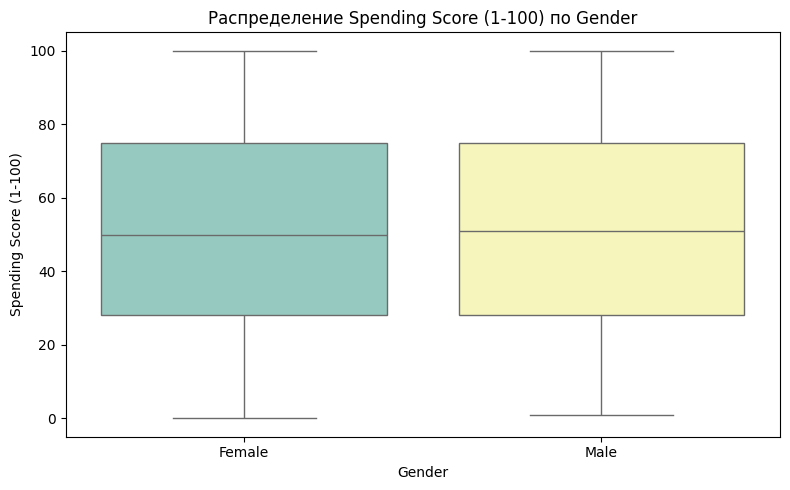


Описательные статистики для Spending Score (1-100) по Gender:
         count       mean        std  min   25%   50%   75%    max
Gender                                                            
Female  1186.0  50.974705  28.032580  0.0  28.0  50.0  75.0  100.0
Male     814.0  50.944717  27.808573  1.0  28.0  51.0  75.0  100.0
------------------------------


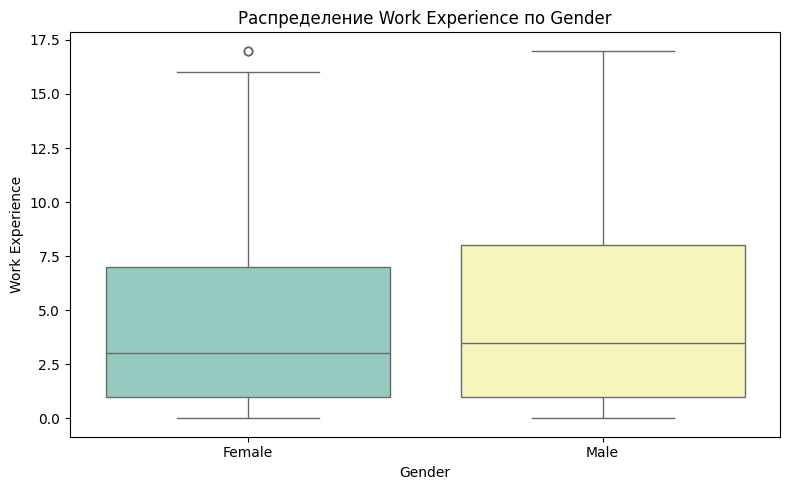


Описательные статистики для Work Experience по Gender:
         count      mean       std  min  25%  50%  75%   max
Gender                                                      
Female  1186.0  4.035413  3.884896  0.0  1.0  3.0  7.0  17.0
Male     814.0  4.200246  3.976307  0.0  1.0  3.5  8.0  17.0
------------------------------


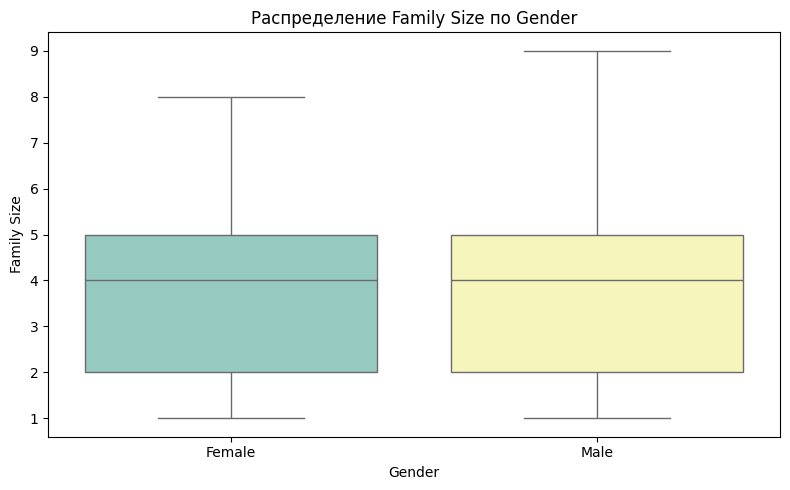


Описательные статистики для Family Size по Gender:
         count      mean       std  min  25%  50%  75%  max
Gender                                                     
Female  1186.0  3.768128  1.976494  1.0  2.0  4.0  5.0  8.0
Male     814.0  3.769042  1.963561  1.0  2.0  4.0  5.0  9.0
------------------------------


In [20]:
numerical_features = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Gender', y=feature, hue='Gender', palette='Set3')
    plt.title(f'Распределение {feature} по Gender')
    plt.xlabel('Gender')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()
    print(f"\nОписательные статистики для {feature} по Gender:")
    print(df.groupby('Gender', observed=False)[feature].describe()) # Added observed=False
    print("-" * 30)

Перевод Gender в числовой формат и подсчет корреляции

In [22]:
df_corr = df.copy()
df_corr['Gender_num'] = df_corr['Gender'].cat.codes  # Женщины=0,Мужчины=1
corr_with_gender = df_corr[numerical_features + ['Gender_num']].corr()['Gender_num'].drop('Gender_num').sort_values(ascending=False)
print("\nКорреляция числовых признаков с полом (Gender_num):")
print(corr_with_gender)


Корреляция числовых признаков с полом (Gender_num):
Work Experience           0.020651
Age                       0.005821
Annual Income ($)         0.004701
Family Size               0.000228
Spending Score (1-100)   -0.000528
Name: Gender_num, dtype: float64


Как видно из графиков, опыт работы и размер семьи у женщин и мужчин имеет примерно одинаковые зеначения, из чего можно сделать вывод что целевая переменная не имеет выраженных зависимостей с целевыми переменными

# **4. Описание результатов и выбор признаков**

На основе проведенного анализа, мы сделали выфводы что никакие типы переменных не имеют четкой, ярко выраженной зависимости с целевой переменной. Поэтому первым шагом для обучения модели предлагаю выбрать все переменные и посмотреть, чтго из этого выйдет

In [24]:
best_features = ['Age', 'Profession', 'Work Experience', 'Family Size', 'Annual Income ($)', 'Spending Score (1-100)']

# **Построение модели**

**Нормализация данных**

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

Выбираем переменные и создаем трансформер для обработки данных разного типа

In [26]:
num_cols = ['Age', 'Work Experience', 'Family Size', 'Annual Income ($)', 'Spending Score (1-100)']
cat_cols = ['Profession']
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])
y = df['Gender']
X = df[best_features]
X_scaled = preprocessor.fit_transform(X)
print("Форма данных до нормализации:", X.shape)
print("Форма данных после нормализации:", X_scaled.shape)

Форма данных до нормализации: (2000, 6)
Форма данных после нормализации: (2000, 15)


# **Обучение модели логистической регрессии**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='liblinear'))
])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Work Experience',
                                                   'Family Size',
                                                   'Annual Income ($)',
                                                   'Spending Score (1-100)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Profession'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

**Оценка модели и метрики качества**

In [28]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import numpy as np
num_cols = ['Age', 'Work Experience', 'Family Size', 'Annual Income ($)', 'Spending Score (1-100)']
# Сделаем предсказания на тестовой выборке
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Вероятности для положительного класса (Male)
# Метрики качества
print("Отчет по классификации:")
print(classification_report(y_test, y_pred, zero_division=0)) # Added zero_division=0
print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred))
print(f"\nAccuracy (точность): {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
# Коэффициенты модели
# Получаем имена признаков после OneHotEncoding
ohe_feature_names = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['Profession'])
num_feature_names = model.named_steps['preprocessor'].named_transformers_['num'].get_feature_names_out(num_cols)
feature_names = np.concatenate([num_feature_names, ohe_feature_names])
# Получаем коэффициенты из обученной модели логистической регрессии
# У логистической регрессии один набор коэффициентов для бинарной классификации
coefficients = model.named_steps['classifier'].coef_[0]
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Absolute_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False).drop('Absolute_Coefficient', axis=1)
print("\nКоэффициенты модели логистической регрессии:")
print(coef_df.to_string(index=False))
# Выведем свободный член (intercept)
intercept = model.named_steps['classifier'].intercept_[0]
print(f"\nСвободный член (Intercept): {intercept:.4f}")

Отчет по классификации:
              precision    recall  f1-score   support

      Female       0.59      1.00      0.75       297
        Male       0.00      0.00      0.00       203

    accuracy                           0.59       500
   macro avg       0.30      0.50      0.37       500
weighted avg       0.35      0.59      0.44       500


Матрица ошибок:
[[297   0]
 [203   0]]

Accuracy (точность): 0.5940
ROC AUC Score: 0.4613

Коэффициенты модели логистической регрессии:
                 Feature  Coefficient
    Profession_Homemaker    -0.563952
       Profession_Artist    -0.224953
       Profession_Doctor     0.192888
Profession_Entertainment     0.147169
      Profession_Unknown     0.091913
   Profession_Healthcare     0.065864
         Work Experience     0.056470
     Profession_Engineer    -0.050529
       Annual Income ($)     0.042346
       Profession_Lawyer     0.038061
                     Age     0.036347
    Profession_Marketing    -0.031353
  Spending Score (

# **Выводы** и описание результатов

Исходя из результатов полученной модели, можно сделать вывод, что модель логистической регрессии полностью игнорирует класс мужчин(Male), об этом свидетельствуют нулевые значения Precision,Recall, из-за этого она довольно точно предсказывает результат(59.4%). Но следует учитывать, что по нашим данным, действительно 59.4% всех людей являются женщины. Это подтверждает ранее сделанные выводы о том, что выбранная целевая переменнаЯ мало зависит от числовых и категориальных признаков таблицы. Из-за этого модель и не может найти какой-либо закономерности.